In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import calendar
from sklearn import metrics
from sklearn import model_selection
from sklearn import ensemble
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import feature_selection

In [2]:
def printresult(actual,predicted):
    confmatrix=metrics.confusion_matrix(actual,predicted)
    accscore=metrics.accuracy_score(actual,predicted)
    precscore=metrics.precision_score(actual,predicted)
    recscore=metrics.recall_score(actual,predicted)
    print(confmatrix)
    print("accuracy : {:.4f}".format(accscore))
    print("precision : {:.4f}".format(precscore))
    print("recall : {:.4f}".format(recscore))
    print("f1-score : {:.4f}".format(metrics.f1_score(actual,predicted)))
    print("AUC : {:.4f}".format(metrics.roc_auc_score(actual,predicted)))

In [3]:
df=pd.read_csv("Interview.csv")

In [4]:
df.head()

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 1,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 2,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 3,Male,Chennai,...,NaN,NaN,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN
3,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 4,Male,Chennai,...,Yes,Yes,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN
4,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 5,Male,Chennai,...,Yes,Yes,Uncertain,No,Married,NaN,NaN,NaN,NaN,NaN


In [5]:
print(df.columns[-5:])
df[df.columns[-5:]].describe()
df.drop(df.columns[-5:],axis=1,inplace=True)

Index(['Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27'],
      dtype='object')


In [6]:
col_dic={"Date of Interview" : "doi",
"Client name" : "cl_nam",
"Industry" : "indus",
"Location" : "cl_loc",
"Position to be closed" : "pos",
"Nature of Skillset" : "skill",
"Interview Type" : "intrvw_typ",
"Name(Cand ID)" : "cand_nam",
"Gender" : "gend",
"Candidate Current Location" : "cand_cur_loc",
"Candidate Job Location" : "cand_j_loc",
"Interview Venue" : "intrvw_ven",
"Candidate Native location" : "cand_nat_loc",
"Have you obtained the necessary permission to start at the required time" : "enq_perm",
"Hope there will be no unscheduled meetings" : "enq_unsch_meet",
"Can I Call you three hours before the interview and follow up on your attendance for the interview" : "enq_call",
"Can I have an alternative number/ desk number. I assure you that I will not trouble you too much" : "enq_num",
"Have you taken a printout of your updated resume. Have you read the JD and understood the same" : "enq_resume",
"Are you clear with the venue details and the landmark." : "enq_ven",
"Has the call letter been shared" : "enq_call_letter",
"Expected Attendance" : "expc_at",
"Observed Attendance" : "obs_at",
"Marital Status" : "married"}

In [7]:
df.rename(columns=col_dic,inplace=True)

|Column|Renamed|
|---|---|
|Date of Interview|doi|
|Client name|cl_nam|
|Industry|indus|
|Location|cl_loc|
|Position to be closed|pos|
|Nature of Skillset|skill|
|Interview Type|intrvw_typ|
|Name(Cand ID)|cand_nam|
|Gender|gend|
|Candidate Current Location|cand_cur_loc|
|Candidate Job Location|cand_j_loc|
|Interview Venue|intrvw_ven|
|Candidate Native location|cand_nat_loc|
|Have you obtained the necessary permission to start at the required time|enq_perm|
|Hope there will be no unscheduled meetings|enq_unsch_meet|
|Can I Call you three hours before the interview and follow up on your attendance for the interview|enq_call|
|Can I have an alternative number/ desk number. I assure you that I will not trouble you too much|enq_num|
|Have you taken a printout of your updated resume. Have you read the JD and understood the same|enq_resume|
|Are you clear with the venue details and the landmark.|enq_ven|
|Has the call letter been shared|enq_call_letter|
|Expected Attendance|expc_at|
|Observed Attendance|obs_at|
|Marital Status|married|

---  
---  
### This section is for testing 

In [8]:
df1=df.copy()

In [9]:
#df_temp=df1.copy()
#df1=df_temp.copy()

In [10]:
# for col in df.columns[1:]:
#     print(df_temp[col].value_counts())
#     print("================================================")

---  
---  
## Client Name :  

In [11]:
df1.cl_nam.value_counts()

Standard Chartered Bank            904
Pfizer                              75
Hospira                             75
Aon Hewitt                          28
Flextronics                         23
ANZ                                 22
Hewitt                              20
UST                                 18
Standard Chartered Bank Chennai     17
Prodapt                             17
Astrazeneca                         15
Williams Lea                        11
Barclays                             5
Aon hewitt Gurgaon                   2
﻿﻿                                   1
Woori Bank                           1
Name: cl_nam, dtype: int64

In [12]:
l1=[
    "Standard Chartered Bank Chennai",
    "Hewitt",
    "Aon hewitt Gurgaon"
]

l2=[
    "standard chartered bank",
    "aon hewitt",
    "aon hewitt",
]

In [13]:
df1.cl_nam.replace(l1,l2,inplace=True)
df1.cl_nam=df1.cl_nam.str.lower()
df1.cl_nam.value_counts()

standard chartered bank    921
hospira                     75
pfizer                      75
aon hewitt                  50
flextronics                 23
anz                         22
ust                         18
prodapt                     17
astrazeneca                 15
williams lea                11
barclays                     5
﻿﻿                           1
woori bank                   1
Name: cl_nam, dtype: int64

In [14]:
df_temp=df1.copy()

---  
---  
## Industry :

In [15]:
df1.indus.value_counts()

BFSI                        949
Pharmaceuticals             165
IT Products and Services     45
Electronics                  23
IT Services                  23
Telecom                      17
IT                           11
Name: indus, dtype: int64

In [16]:
df1.indus.replace(["IT Products and Services","IT Services"],["IT","IT"],inplace=True)
df1.indus=df1.indus.str.lower()
print(df1.indus.value_counts())

bfsi               949
pharmaceuticals    165
it                  79
electronics         23
telecom             17
Name: indus, dtype: int64


In [17]:
df_temp=df1.copy()

---  
---  
## Client Location:  

In [18]:
print(df1.cl_loc.value_counts())

Chennai       754
Bangalore     292
chennai        86
Hyderabad      38
Gurgaon        33
Noida          15
- Cochin-       9
chennai         3
Gurgaonr        1
CHENNAI         1
Delhi           1
Name: cl_loc, dtype: int64


In [19]:
df1.cl_loc=df1.cl_loc.str.lower().str.strip()
df1.cl_loc.replace(["gurgaonr","- cochin-"],["gurgaon","cochin"],inplace=True)
print(df1.cl_loc.value_counts())

chennai      844
bangalore    292
hyderabad     38
gurgaon       34
noida         15
cochin         9
delhi          1
Name: cl_loc, dtype: int64


In [20]:
df_temp=df1.copy()

---  
---  
## Position to be closed:

In [21]:
print(df1.pos.value_counts())

Routine                1023
Niche                   163
Dot Net                  18
Trade Finance            11
AML                       8
Production- Sterile       5
Selenium testing          5
Name: pos, dtype: int64


In [22]:
df1.pos=df1.pos.str.lower()
print(df1.pos.value_counts())

routine                1023
niche                   163
dot net                  18
trade finance            11
aml                       8
production- sterile       5
selenium testing          5
Name: pos, dtype: int64


---  
---  
## Nature of skill set:  
too many weird values. Will look at it later

In [23]:
print(df1.skill.value_counts()[:5])

JAVA/J2EE/Struts/Hibernate    220
Fresher                        86
Accounting Operations          86
AML/KYC/CDD                    84
CDD KYC                        52
Name: skill, dtype: int64


---  
---  
## Interview type:

In [24]:
df1.intrvw_typ.value_counts()

Scheduled Walk In    456
Scheduled            371
Walkin               189
Scheduled Walkin     189
Walkin                27
Sceduled walkin        1
Name: intrvw_typ, dtype: int64

In [25]:
df1.intrvw_typ=df1.intrvw_typ.str.lower().str.strip()
df1.intrvw_typ.replace(["scheduled walk in","sceduled walkin"],["scheduled walkin","scheduled walkin"],inplace=True)
df1.intrvw_typ.value_counts()

scheduled walkin    646
scheduled           371
walkin              216
Name: intrvw_typ, dtype: int64

In [26]:
df_temp=df1.copy()

---  
---  
## Name(Cand ID):  

---  
---  
## Gender:

In [27]:
df1.gend=df1.gend.str.lower().str.strip()

---  
---  
## Candidate current location:

In [28]:
df1.cand_cur_loc.value_counts()

Chennai       754
Bangalore     292
chennai        86
Hyderabad      38
Gurgaon        34
Noida          15
- Cochin-       9
chennai         3
CHENNAI         1
Delhi           1
Name: cand_cur_loc, dtype: int64

In [29]:
df1.cand_cur_loc=df1.cand_cur_loc.str.lower().str.strip()
df1.cand_cur_loc.replace(["- cochin-"],["cochin"],inplace=True)
print(df1.cand_cur_loc.value_counts())

chennai      844
bangalore    292
hyderabad     38
gurgaon       34
noida         15
cochin         9
delhi          1
Name: cand_cur_loc, dtype: int64


In [30]:
df_temp=df1.copy()

---  
---  
## Candidate Job locations:

In [31]:
df1.cand_j_loc.value_counts()

Chennai          893
Bangalore        259
Gurgaon           35
Visakapatinam     21
Noida             15
- Cochin-          9
Hosur              1
Name: cand_j_loc, dtype: int64

In [32]:
df1.cand_j_loc=df1.cand_cur_loc.str.lower().str.strip()
df1.cand_j_loc.replace(["- cochin-"],["cochin"],inplace=True)
print(df1.cand_j_loc.value_counts())

chennai      844
bangalore    292
hyderabad     38
gurgaon       34
noida         15
cochin         9
delhi          1
Name: cand_j_loc, dtype: int64


In [33]:
df_temp=df1.copy()

---  
---  
## Interview venue:

In [34]:
df1.intrvw_ven.value_counts()

Chennai       852
Bangalore     277
Hyderabad      40
Gurgaon        35
Noida          15
- Cochin-       9
Hosur           5
Name: intrvw_ven, dtype: int64

In [35]:
df1.intrvw_ven=df1.intrvw_ven.str.lower().str.strip()
df1.intrvw_ven.replace(["- cochin-"],["cochin"],inplace=True)
print(df1.intrvw_ven.value_counts())

chennai      852
bangalore    277
hyderabad     40
gurgaon       35
noida         15
cochin         9
hosur          5
Name: intrvw_ven, dtype: int64


In [36]:
df_temp=df1.copy()

---  
---  
## Candidate native location:  
### dont know what to do with this

In [37]:
l1=df1.cand_nat_loc.str.lower().str.strip().value_counts().index.tolist()

---  
---  
## Have you obtained the necessary permission to start at the required time

In [38]:
df1.enq_perm.value_counts()

Yes               917
No                 79
Not yet            19
Na                  5
Yet to confirm      4
yes                 4
NO                  1
Name: enq_perm, dtype: int64

In [39]:
df1.enq_perm=df1.enq_perm.str.lower()
df1.enq_perm.replace(["not yet","na","yet to confirm"],["no","no","no"],inplace=True)
print(df1.enq_perm.value_counts())

yes    921
no     108
Name: enq_perm, dtype: int64


In [40]:
#df_temp=df1.copy
df1.enq_perm.isna().sum()

205

In [ ]:
df1['enq_perm'].fillna("uncertain",inplace=True)
df1.drop(df.index[[1233]], inplace = True)

---  
---  
## Hope there will be no unscheduled meetings

In [ ]:
df1.enq_unsch_meet.str.lower().value_counts()

yes         954
na           20
no            6
not sure      5
cant say      1
Name: enq_unsch_meet, dtype: int64

In [ ]:
df1.enq_unsch_meet=df1.enq_unsch_meet.str.lower()
df1.enq_unsch_meet.replace(["na","cant say","not sure"],["no","uncertain","uncertain"],inplace=True)
df1.enq_unsch_meet.value_counts()

yes          954
no            26
uncertain      6
Name: enq_unsch_meet, dtype: int64

In [ ]:
df1.enq_unsch_meet.isna().sum()

247

In [ ]:
df1.enq_unsch_meet.fillna("uncertain",inplace=True)

In [ ]:
df_temp=df1.copy()

---  
---  
## Can I Call you three hours before the interview and follow up on your attendance for the interview

In [ ]:
df1.enq_call.value_counts()

Yes        951
Na          20
No          10
yes          4
No Dont      1
Name: enq_call, dtype: int64

In [ ]:
df1.enq_call=df1.enq_call.str.lower()
df1.enq_call.replace(["na","no dont"],["no","no"],inplace=True)
df1.enq_call.value_counts()

yes    955
no      31
Name: enq_call, dtype: int64

In [ ]:
df1.enq_call.fillna("uncertain",inplace=True)

In [ ]:
df_temp=df1.copy()

---  
---  
## Can I have an alternative number/ desk number. I assure you that I will not trouble you too much

In [ ]:
df1.enq_num.value_counts()

Yes                          936
No                            27
Na                            19
No I have only thi number      2
na                             1
yes                            1
Name: enq_num, dtype: int64

In [ ]:
df1.enq_num=df1.enq_num.str.lower()
df1.enq_num.replace(["na","no i have only thi number"],["no","no"],inplace=True)
print(df1.enq_num.value_counts())

yes    937
no      49
Name: enq_num, dtype: int64


In [ ]:
df1.enq_num.fillna("uncertain",inplace=True)

---  
---  
## Have you taken a printout of your updated resume. Have you read the JD and understood the same

In [ ]:
df1.enq_resume.value_counts()

Yes                      940
Na                        19
No                        16
Not Yet                    4
yes                        2
Not yet                    2
na                         1
No- will take it soon      1
Name: enq_resume, dtype: int64

In [ ]:
df1.enq_resume=df1.enq_resume.str.lower()
df1.enq_resume.replace(["na","not yet","no- will take it soon"],["no","no","no"],inplace=True)
df1.enq_resume.value_counts()

yes    942
no      43
Name: enq_resume, dtype: int64

In [ ]:
df1.enq_resume.fillna("uncertain",inplace=True)

In [ ]:
df_temp=df1.copy()

---  
---  
## Are you clear with the venue details and the landmark.

In [ ]:
df1.enq_ven.value_counts()

Yes                    946
Na                      19
No                      14
yes                      2
No- I need to check      2
na                       1
no                       1
Name: enq_ven, dtype: int64

In [ ]:
df1.enq_ven=df1.enq_ven.str.lower()
df1.enq_ven.replace(["na","no- i need to check"],["no","no"],inplace=True)
print(df1.enq_ven.value_counts())

yes    948
no      37
Name: enq_ven, dtype: int64


In [ ]:
df1.enq_ven.fillna("uncertain",inplace=True)

In [ ]:
df_temp=df1.copy()

---  
---  
## Has the call letter been shared

In [ ]:
df1.enq_call_letter.value_counts()

Yes               932
Na                 19
No                 17
Not Sure            8
Need To Check       3
Not yet             2
yes                 2
na                  1
Not sure            1
no                  1
Havent Checked      1
Yet to Check        1
Name: enq_call_letter, dtype: int64

In [ ]:
df1.enq_call_letter=df1.enq_call_letter.str.lower()
df1.enq_call_letter.replace(["na","not yet","not sure","havent checked","yet to check","need to check"],["no","no","uncertain","uncertain","uncertain","uncertain"],inplace=True)
print(df1.enq_call_letter.value_counts())

yes          934
no            40
uncertain     14
Name: enq_call_letter, dtype: int64


In [ ]:
df1.enq_call_letter.fillna("uncertain",inplace=True)
df1.enq_call_letter.value_counts()

yes          934
uncertain    259
no            40
Name: enq_call_letter, dtype: int64

In [ ]:
df_temp=df1.copy()

---  
---  
## Expected Attendance

In [ ]:
df1.expc_at.value_counts()

Yes          882
Uncertain    250
No            59
NO            34
11:00 AM       1
10.30 Am       1
yes            1
Name: expc_at, dtype: int64

In [ ]:
df1.expc_at=df1.expc_at.str.lower()
df1.expc_at.replace(["11:00 am","10.30 am"],["yes","yes"],inplace=True)
print(df1.expc_at.value_counts())

yes          885
uncertain    250
no            93
Name: expc_at, dtype: int64


In [ ]:
df1.expc_at.fillna("uncertain",inplace=True)

In [ ]:
df_temp=df1.copy()

---  
---  
## Observed Attendance

In [ ]:
df1.obs_at.value_counts()

Yes     701
No      401
yes      81
NO       35
no        7
No        6
no        1
yes       1
Name: obs_at, dtype: int64

In [ ]:
df1.obs_at=df1.obs_at.str.lower().str.strip()
print(df1.obs_at.value_counts())

yes    783
no     450
Name: obs_at, dtype: int64


In [ ]:
df_temp=df1.copy()

---  
---  
## Marital Status

In [ ]:
df1.married.value_counts()

Single     767
Married    466
Name: married, dtype: int64

In [ ]:
df1.married=df1.married.str.lower()
print(df1.married.value_counts())

single     767
married    466
Name: married, dtype: int64


In [ ]:
df_temp=df1.copy()

---  
---  
## DATE OF INTERVIEW

In [ ]:
#This is used to format the dates 
def clean_date(date):
    date = date.str.strip()
    date = date.str.split("&").str[0]
    date = date.str.replace('–', '/')
    date = date.str.replace('.', '/')
    date = date.str.replace('Apr', '04')
    date = date.str.replace('-', '/')
    date = date.str.replace(' ', '/')
    date = date.str.replace('//+', '/')
    return date

# modeling_df = modeling_df[modeling_df['date'] < '2018-01-01'] 

In [ ]:
df1['doi'] = clean_date(df1['doi'])

In [ ]:
type(df1.doi[0])

str

In [ ]:
#To make all the values in the same format of date time to get the day of interview and the month of interview
df1['year'] = df1['doi'].str.split("/").str[2]
df1['day'] = df1['doi'].str.split("/").str[0]
df1['month'] = df1['doi'].str.split("/").str[1]
df1['year'].replace(['16', '15'], ['2016', '2015'], inplace = True)
df1['date'] = pd.to_datetime(pd.DataFrame({'year': df1['year'],
                                            'month': df1['month'],
                                            'day': df1['day']}), format = '%Y-%m-%d')
df1.drop(['year', 'month', 'day'], axis = 1, inplace = True)

In [ ]:
dt=df1['date']

In [ ]:
ls=[]
for i in range(len(dt)):
    ls.append(dt[i].month)
df1['month']=ls

In [ ]:
ls=[]
for i in range(len(dt)):
    ls.append(dt[i].weekday()+1)
df1['day']=ls

In [ ]:
df1.drop(columns=['doi','date','skill'],axis=1,inplace=True)

In [ ]:
df_temp=df1.copy()

In [ ]:
for col in df1.columns:
    print(col," ",df1[col].isna().sum())

cl_nam   0
indus   0
cl_loc   0
pos   0
intrvw_typ   0
cand_nam   0
gend   0
cand_cur_loc   0
cand_j_loc   0
intrvw_ven   0
cand_nat_loc   0
enq_perm   0
enq_unsch_meet   0
enq_call   0
enq_num   0
enq_resume   0
enq_ven   0
enq_call_letter   0
expc_at   0
obs_at   0
married   0
month   0
day   0


In [ ]:
df_temp=df1.copy()

---  
---  
# Cleaned:

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1233 entries, 0 to 1232
Data columns (total 23 columns):
cl_nam             1233 non-null object
indus              1233 non-null object
cl_loc             1233 non-null object
pos                1233 non-null object
intrvw_typ         1233 non-null object
cand_nam           1233 non-null object
gend               1233 non-null object
cand_cur_loc       1233 non-null object
cand_j_loc         1233 non-null object
intrvw_ven         1233 non-null object
cand_nat_loc       1233 non-null object
enq_perm           1233 non-null object
enq_unsch_meet     1233 non-null object
enq_call           1233 non-null object
enq_num            1233 non-null object
enq_resume         1233 non-null object
enq_ven            1233 non-null object
enq_call_letter    1233 non-null object
expc_at            1233 non-null object
obs_at             1233 non-null object
married            1233 non-null object
month              1233 non-null int64
day           

In [ ]:
df1.head()

,cl_nam,indus,cl_loc,pos,intrvw_typ,cand_nam,gend,cand_cur_loc,cand_j_loc,intrvw_ven,...,enq_call,enq_num,enq_resume,enq_ven,enq_call_letter,expc_at,obs_at,married,month,day
0,hospira,pharmaceuticals,chennai,production- sterile,scheduled walkin,Candidate 1,male,chennai,chennai,hosur,...,yes,yes,yes,yes,yes,yes,no,single,2,5
1,hospira,pharmaceuticals,chennai,production- sterile,scheduled walkin,Candidate 2,male,chennai,chennai,hosur,...,yes,yes,yes,yes,yes,yes,no,single,2,5
2,hospira,pharmaceuticals,chennai,production- sterile,scheduled walkin,Candidate 3,male,chennai,chennai,hosur,...,uncertain,uncertain,uncertain,uncertain,uncertain,uncertain,no,single,2,5
3,hospira,pharmaceuticals,chennai,production- sterile,scheduled walkin,Candidate 4,male,chennai,chennai,hosur,...,no,yes,no,yes,yes,uncertain,no,single,2,5
4,hospira,pharmaceuticals,chennai,production- sterile,scheduled walkin,Candidate 5,male,chennai,chennai,hosur,...,yes,no,yes,yes,yes,uncertain,no,married,2,5


---
---  
## One Hot Encoding:

In [ ]:
df1.drop('cand_nam',axis=1,inplace=True)

In [ ]:
df2=df1.copy()
def t(col):
    j=1
    dic={}
    for i in df2[col].value_counts().index:
        dic[i]=j
        j+=1
    df2[col].replace(dic,inplace=True)

In [ ]:
for col in df2.columns:
    if(col=='month' or col=='day'):
        continue
    t(col)

In [ ]:
df3 = df2.copy()

In [ ]:
#df2.columns[]

In [ ]:
#ohel = ['intrvw_typ','gend','enq_perm','enq_unsch_meet','enq_call','enq_num','enq_resume','enq_ven','enq_call_letter','married']
ohel=['cl_nam', 'indus', 'cl_loc', 'pos', 'intrvw_typ', 'gend',
       'cand_cur_loc', 'cand_j_loc', 'intrvw_ven', 'cand_nat_loc', 'enq_perm',
       'enq_unsch_meet', 'enq_call', 'enq_num', 'enq_resume', 'enq_ven',
       'enq_call_letter', 'married', 'month', 'day']
df3 = pd.get_dummies(df3, prefix=ohel, columns=ohel)

In [ ]:
df3.columns

Index(['expc_at', 'obs_at', 'cl_nam_1', 'cl_nam_2', 'cl_nam_3', 'cl_nam_4',
       'cl_nam_5', 'cl_nam_6', 'cl_nam_7', 'cl_nam_8',
       ...
       'month_9', 'month_11', 'month_12', 'day_1', 'day_2', 'day_3', 'day_4',
       'day_5', 'day_6', 'day_7'],
      dtype='object', length=145)

---  
---  
## Random Forest Classifier:

[[126  52]
 [ 31  38]]
accuracy : 0.6640
precision : 0.8025
recall : 0.7079
f1-score : 0.7522
AUC : 0.6293


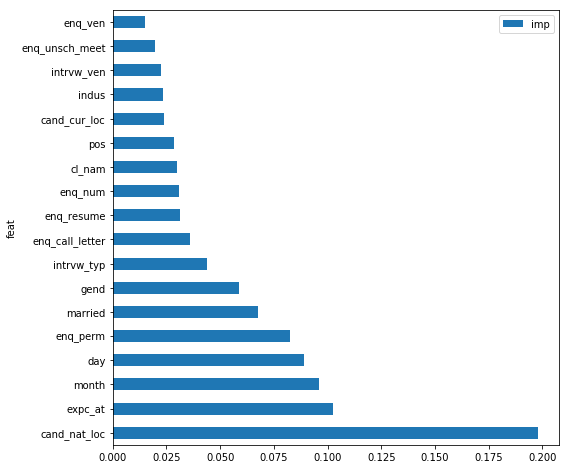

In [ ]:
#x=df2.drop("obs_at",axis=1)
x=df2.drop(["obs_at","cand_j_loc","enq_call","cl_loc"],axis=1)
y=df2.obs_at
Xtrain,xtest,Ytrain,ytest=model_selection.train_test_split(x,y,test_size=.2,random_state=19,stratify=y)
model=ensemble.RandomForestClassifier(n_estimators=100)
model.fit(Xtrain,Ytrain)
predicted=model.predict(xtest)
printresult(predicted,ytest)
## -----
feat_imp=pd.DataFrame({"imp":model.feature_importances_})
feat_imp["feat"]=Xtrain.columns
feat_imp.sort_values(by="imp",ascending=False,inplace=True)
feat_imp.set_index("feat",inplace=True)
feat_imp.plot.barh(figsize=(8,8))

[[127  47]
 [ 30  43]]
accuracy : 0.6883
precision : 0.8089
recall : 0.7299
f1-score : 0.7674
AUC : 0.6595


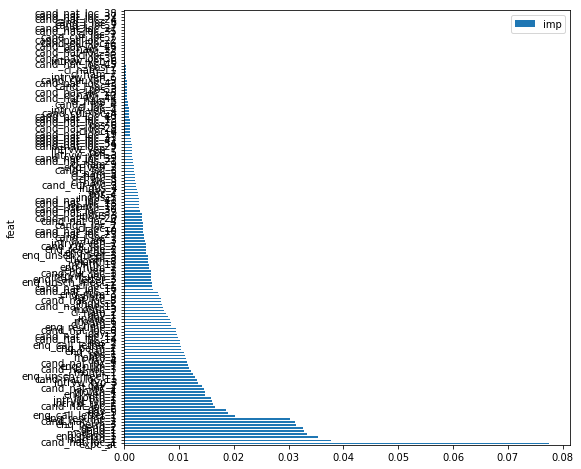

In [ ]:
x=df3.drop("obs_at",axis=1)
y=df3.obs_at
Xtrain,xtest,Ytrain,ytest=model_selection.train_test_split(x,y,test_size=.2,random_state=42,stratify=y)
model=ensemble.RandomForestClassifier(n_estimators=100)
model.fit(Xtrain,Ytrain)
predicted=model.predict(xtest)
printresult(predicted,ytest)
## -----
feat_imp=pd.DataFrame({"imp":model.feature_importances_})
feat_imp["feat"]=Xtrain.columns
feat_imp.sort_values(by="imp",ascending=False,inplace=True)
feat_imp.set_index("feat",inplace=True)
feat_imp.plot.barh(figsize=(8,8))

### Cross validating:
#### 5 fold

In [ ]:
# for score in ["accuracy", "precision", "recall"]:
x=df2.drop("obs_at",axis=1)
y=df2.obs_at

print("before ohe")
model_rfc=ensemble.RandomForestClassifier(n_estimators=100)
for score in ["accuracy", "precision", "recall","f1","roc_auc"]:
    scores=model_selection.cross_val_score(model_rfc,x,y,cv=5,scoring=score)   
    print(score,scores,scores.mean())




x=df3.drop("obs_at",axis=1)
y=df3.obs_at

print("\nafter ohe")
model_rfc=ensemble.RandomForestClassifier(n_estimators=100)
for score in ["accuracy", "precision", "recall","f1","roc_auc"]:
    scores=model_selection.cross_val_score(model_rfc,x,y,cv=5,scoring=score)   
    print(score,scores,scores.mean())  

before ohe
accuracy [0.70445344 0.56275304 0.74089069 0.67073171 0.67886179] 0.6715381323853725
precision [0.68778281 0.76041667 0.74054054 0.69035533 0.68372093] 0.7125632545637737
recall [0.96815287 0.49044586 0.89171975 0.87179487 0.92948718] 0.8303201045239261
f1 [0.8042328  0.578125   0.80232558 0.73623188 0.78918919] 0.7420208917750626
roc_auc [0.63906582 0.63220099 0.68619958 0.53596866 0.61901709] 0.6224904277133577

after ohe
accuracy [0.70445344 0.57489879 0.73279352 0.67479675 0.68699187] 0.6747868733748066
precision [0.68444444 0.74509804 0.74860335 0.68686869 0.68396226] 0.7097953573270137
recall [0.98089172 0.49044586 0.85350318 0.84615385 0.93589744] 0.8213784092764984
f1 [0.80839895 0.56126482 0.8048048  0.76       0.78590786] 0.7440752872298033
roc_auc [0.64348903 0.64447983 0.73658882 0.59537037 0.62962963] 0.6499115357395613


In [ ]:
rfcev=feature_selection.RFECV(model,cv=5,scoring="precision")
#rfcev.fit(x,y)
x_new=rfcev.fit_transform(x,y)

In [ ]:
print(x_new)

In [ ]:
len(x_new)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x=df2.drop("obs_at",axis=1)
y=df2.obs_at
#data = pd.read_csv("D://Blogs//train.csv")
#X = data.iloc[:,0:20]  #independent columns
#y = data.iloc[:,-1]    #target column i.e price range#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(8,'Score'))  #print 10 best features


x=df3.drop("obs_at",axis=1)
y=df3.obs_at
#data = pd.read_csv("D://Blogs//train.csv")
#X = data.iloc[:,0:20]  #independent columns
#y = data.iloc[:,-1]    #target column i.e price range#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(8,'Score'))  #print 10 best features

In [ ]:
col1=["expc_at","enq_perm","enq_call_letter","enq_resume","enq_ven","enq_num","enq_unsch_meet","enq_call"]
col2=["enq_perm_3","expc_at","enq_call_letter_2","enq_unsch_meet_2","enq_resume_3","enq_call_2","enq_num_2","enq_resume_2"]

In [ ]:
x=df2[col1]
y=df2.obs_at
print("before ohe")
model_rfc=ensemble.RandomForestClassifier(n_estimators=100)
for score in ["accuracy", "precision", "recall","f1","roc_auc"]:
    scores=model_selection.cross_val_score(model_rfc,x,y,cv=5,scoring=score)   
    print(score,scores,scores.mean())
    
    
x=df3[col2]
y=df3.obs_at

print("\nafter ohe")
model_rfc=ensemble.RandomForestClassifier(n_estimators=100)
for score in ["accuracy", "precision", "recall","f1","roc_auc"]:
    scores=model_selection.cross_val_score(model_rfc,x,y,cv=5,scoring=score)   
    print(score,scores,scores.mean())  